In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Reading in the panda dataframe
coffee_set = pd.read_csv("data/Coffee_Data")
coffee_set.head()

,Unnamed: 0,Country.of.Origin,Number.of.Bags,Bag.Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Ethiopia,300,60 kg,8.67,8.83,8.67,8.75,8.50,8.42,...,10.0,8.75,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
1,1,Ethiopia,300,60 kg,8.75,8.67,8.50,8.58,8.42,8.42,...,10.0,8.58,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
2,2,Guatemala,5,1,8.42,8.50,8.42,8.42,8.33,8.42,...,10.0,9.25,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
3,3,Ethiopia,320,60 kg,8.17,8.58,8.42,8.42,8.50,8.25,...,10.0,8.67,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
4,4,Ethiopia,300,60 kg,8.25,8.50,8.25,8.50,8.42,8.33,...,10.0,8.58,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0


In [3]:
# Need to fixe index column so going to make Unamed the index
coffee_set.set_index("Unnamed: 0", inplace = True)

In [4]:
# Seeing if chnage took
coffee_set.head()

,Country.of.Origin,Number.of.Bags,Bag.Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Ethiopia,300,60 kg,8.67,8.83,8.67,8.75,8.50,8.42,10.0,...,10.0,8.75,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
1,Ethiopia,300,60 kg,8.75,8.67,8.50,8.58,8.42,8.42,10.0,...,10.0,8.58,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
2,Guatemala,5,1,8.42,8.50,8.42,8.42,8.33,8.42,10.0,...,10.0,9.25,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
3,Ethiopia,320,60 kg,8.17,8.58,8.42,8.42,8.50,8.25,10.0,...,10.0,8.67,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
4,Ethiopia,300,60 kg,8.25,8.50,8.25,8.50,8.42,8.33,10.0,...,10.0,8.58,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0


In [5]:
# Change == "Worked"

In [6]:
# Converting the Country.of.Origin to binary
# Ethiopia is 1 and Guatemala is 0
coffee_set["Country.of.Origin"] = np.where(coffee_set["Country.of.Origin"] == "Ethiopia", 1, 0)

In [7]:
# Making sure the chnage took
coffee_set.head()

,Country.of.Origin,Number.of.Bags,Bag.Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,300,60 kg,8.67,8.83,8.67,8.75,8.50,8.42,10.0,...,10.0,8.75,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
1,1,300,60 kg,8.75,8.67,8.50,8.58,8.42,8.42,10.0,...,10.0,8.58,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
2,0,5,1,8.42,8.50,8.42,8.42,8.33,8.42,10.0,...,10.0,9.25,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
3,1,320,60 kg,8.17,8.58,8.42,8.42,8.50,8.25,10.0,...,10.0,8.67,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
4,1,300,60 kg,8.25,8.50,8.25,8.50,8.42,8.33,10.0,...,10.0,8.58,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0


In [8]:
# Change == "Worked"

In [9]:
# Need to see every column so I know what I want to use for splitting
coffee_set.columns

Index(['Country.of.Origin', 'Number.of.Bags', 'Bag.Weight', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup',
       'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Category.Two.Defects',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [10]:
# Setting the columns I want to split for first graph
X = coffee_set[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance", "Uniformity"]]
y = coffee_set[["Number.of.Bags"]]

In [11]:
# dropping NA's/NanN if there is missing data before splitting
coffee_set.dropna(inplace = True)

In [12]:
# starting the train/test split on data by 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Checking training shapes to see if it's the same
print(X_train.shape)
print(y_train.shape)

(4, 7)
(4, 1)


In [13]:
# Checking testing shapes to see if it's the same
print(X_test.shape)
print(y_test.shape)

(1, 7)
(1, 1)


In [14]:
# Instantiate a model object
LR = LinearRegression()

In [15]:
# Fitting the the model with the data.
# This is where the model learns from the data.
LR.fit(X_train, y_train)

LinearRegression()

In [16]:
# Generating predictions
# This is where the X (input) goes into the model
# and math is done to estimate our y (output).
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [17]:
# Seeing how bad/good the prediction is
print(metrics.mean_squared_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))

4.1359030627651384e-25
53943.41123256815


In [18]:
# The MSE is way higher on the testing and I am not sure whether or not that is good or bad
# But I feel like I should watch out for it

In [19]:
# Calculate baseline_model.
baseline_model = y_train.mean()

# Calculate MSE for the baseline model.
baseline_pred = np.full(len(y_test), baseline_model)
mse_baseline = metrics.mean_squared_error(y_test, baseline_pred)

# Compare baseline MSE and testing MSE.
print(mse_baseline)
print(metrics.mean_squared_error(y_test, y_test_pred))

4726.5625
53943.41123256815


In [20]:
# The baseline MSE is signifcantly lower than the testing MSE.
# Since the gap is so huge, I think there is a chnace of bit of under-fitting.


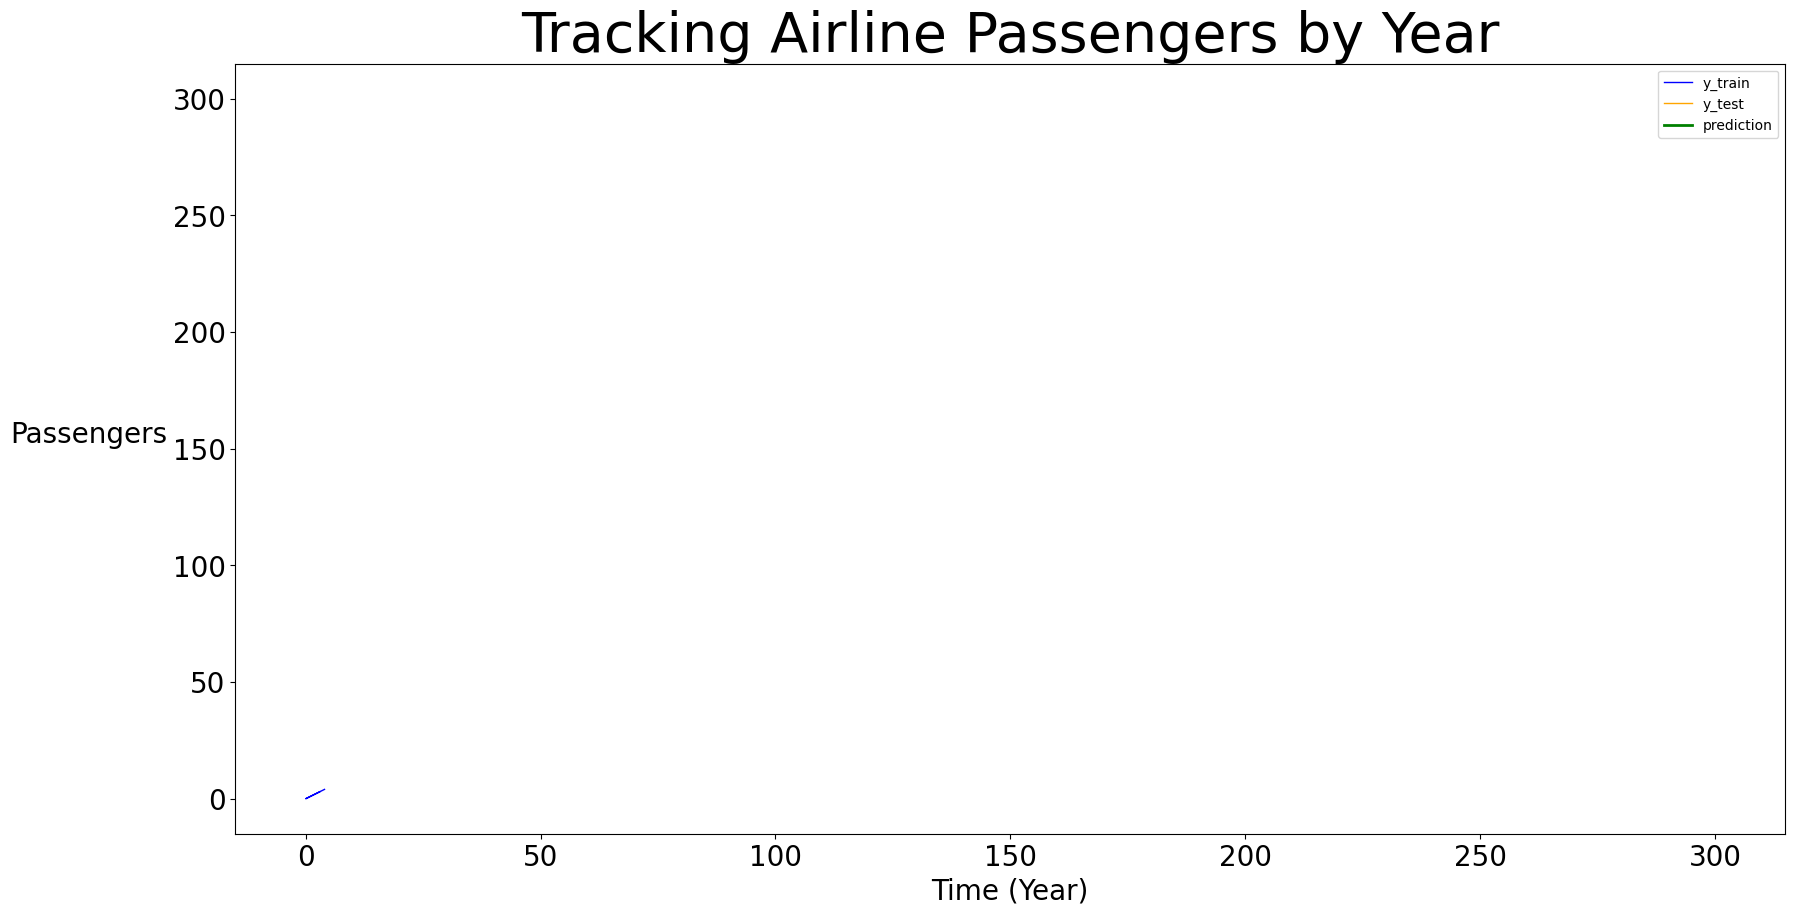

In [21]:
# Plotting our predictions
# Visual to see what's happening and show class a representation
fig, ax = plt.subplots(figsize = (20, 10))

ax = plt.plot(y_train.index, X_train.index, label = "y_train", linewidth = 1, color = "blue");
ax = plt.plot(y_test, label = "y_test", linewidth = 1, color = "orange");
ax = plt.plot(y_test, y_test_pred, label = "prediction", linewidth = 2, color = "green");

# Graph lables (Title, X-axis, Y-axis)
plt.title("Tracking Airline Passengers by Year", size = 40);
plt.xlabel("Time (Year)", size = 20);
plt.xticks(rotation = 0, size = 20);
plt.ylabel("Passengers", size = 20, rotation = 0, ha = "right");
plt.yticks(rotation = 0, size = 20);
plt.legend()

plt.show()